## Question 2: Mitochondria

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import string
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [295]:
# read data
dataoriginal = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Mt1t.mutate.csv")

## Data Preprocessing

In [296]:
data = dataoriginal
# get rid of useless rows
data = data.drop([0,1,2], axis=0)
# split dataset
groups = data['Group']
data = data.drop('Group', axis=1)
# replace NaN values with zeros
data.fillna(0, inplace=True)
# cast all values as ints
data = data.astype(int)

## PCA Dimension Reduction

The number of principle components with the highest ratio of variance to components is 150
Using 150 components will preserve 86.18% of the data


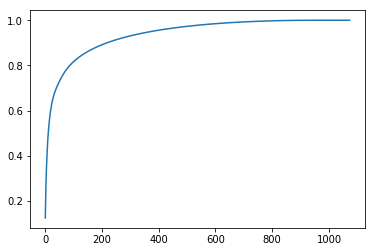

(1074, 150)


In [297]:
pca = PCA().fit(data)
ratios = np.cumsum(pca.explained_variance_ratio_)
#ratios = temp/(np.arange(len(temp))+1)
maxRatioIndex = 0
for n in range(1,len(ratios)):
    if ratios[n]/(n/len(ratios)+1) > ratios[maxRatioIndex]/(maxRatioIndex/len(ratios)+1):
        maxRatioIndex = n
#ratios = sorted(ratios)
plt.plot (ratios)
print ("The number of principle components with the highest ratio of variance to components is", maxRatioIndex)
print ("Using", maxRatioIndex, "components will preserve", str(100*ratios[maxRatioIndex].round(4)) + "% of the data")
plt.show()
pca = PCA(n_components=maxRatioIndex)
pca.fit(data)
data = pca.transform(data)
print (data.shape)

## KMeans

In [298]:
# first find optimal number of clusters using silhouette scores
silhouetteScores = []
for numClusters in range(3,50):
    kmeans = KMeans(n_clusters=numClusters, random_state=int(time.time()))
    pred = kmeans.fit_predict(data)
    silhouetteScores.append([silhouette_score(data, pred),numClusters])
optimal = sorted(silhouetteScores)[-1][1]
print ("The optimal number of clusters according to silhouette scores is", optimal)

The optimal number of clusters according to silhouette scores is 40


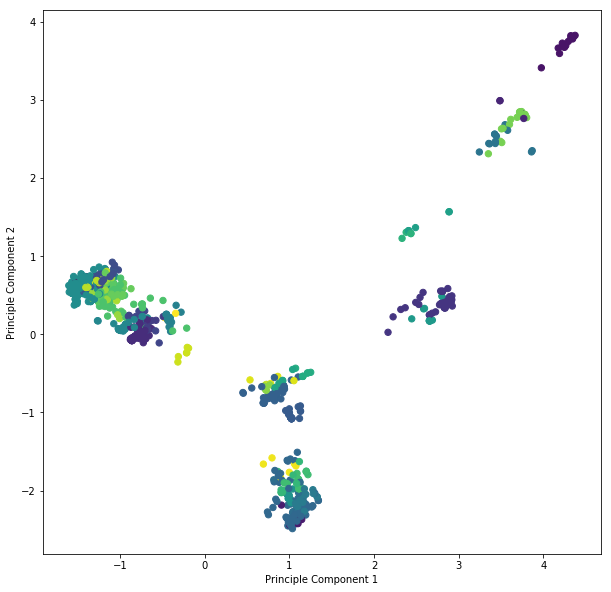

In [299]:
plt.figure(figsize=(10,10))
kmeans = KMeans(n_clusters=optimal, random_state=int(time.time()))
kmeans.fit(data)
kmeansLabels = kmeans.predict(data)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(data[:, 0], data[:, 1], c=kmeansLabels, marker="o", s=40, cmap='viridis')
plt.show()

## GMM

In [300]:
# first find optimal number of clusters using silhouette scores
silhouetteScores = []
for numComponents in range(3,50):
    gmm = GaussianMixture(n_components=numComponents, covariance_type='full')
    gmm.fit(data)
    pred = gmm.predict(data)
    silhouetteScores.append([silhouette_score(data, pred),numClusters])
optimal = sorted(silhouetteScores)[-1][1]
print ("The optimal number of clusters according to silhouette scores is", optimal)

The optimal number of clusters according to silhouette scores is 49


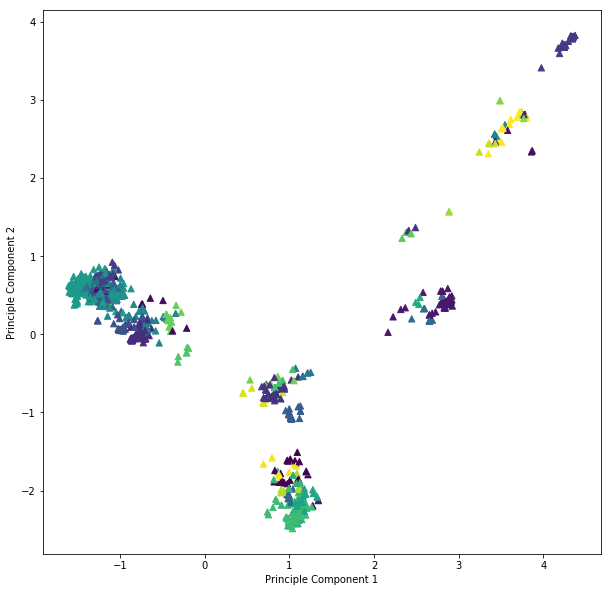

In [301]:
plt.figure(figsize=(10,10))
gmm = GaussianMixture(n_components=optimal, covariance_type='full').fit(data)
gmmLabels = gmm.predict(data)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(data[:, 0], data[:, 1], c=gmmLabels, marker="^", s=40, cmap='viridis')
plt.show()

## AgglomerativeClusutering

In [302]:
# first find optimal number of clusters using silhouette scores
silhouetteScores = []
for numClusters in range(3,50):
    agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=numClusters, pooling_func='deprecated')
    pred = agglo.fit_predict(data)
    silhouetteScores.append([silhouette_score(data, pred),numClusters])
optimal = sorted(silhouetteScores)[-1][1]
print ("The optimal number of clusters according to silhouette scores is", optimal)

The optimal number of clusters according to silhouette scores is 39


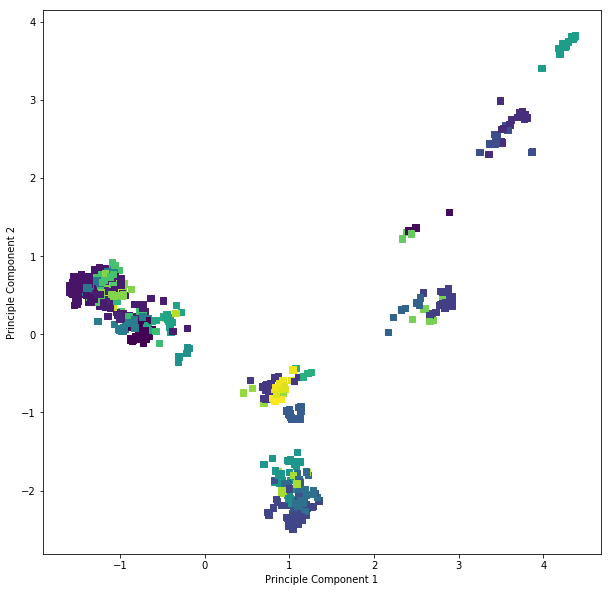

In [303]:
plt.figure(figsize=(10,10))
agglo = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto', connectivity=None, linkage='ward', memory=None, n_clusters=optimal, pooling_func='deprecated')
agglo.fit(data)
aggloLabels = agglo.labels_
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(data[:, 0], data[:, 1], c=aggloLabels, marker="s", s=40, cmap='viridis')
plt.show()

## Spectral Clustering

In [304]:
# first find optimal number of clusters using silhouette scores
silhouetteScores = []
for numClusters in range(3,50):
    spectral = SpectralClustering(n_clusters=numClusters, affinity='nearest_neighbors', assign_labels='kmeans')
    pred = spectral.fit_predict(data)
    silhouetteScores.append([silhouette_score(data, pred),numClusters])
optimal = sorted(silhouetteScores)[-1][1]
print ("The optimal number of clusters according to silhouette scores is", optimal)

/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


The optimal number of clusters according to silhouette scores is 39


/Users/rohit1/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


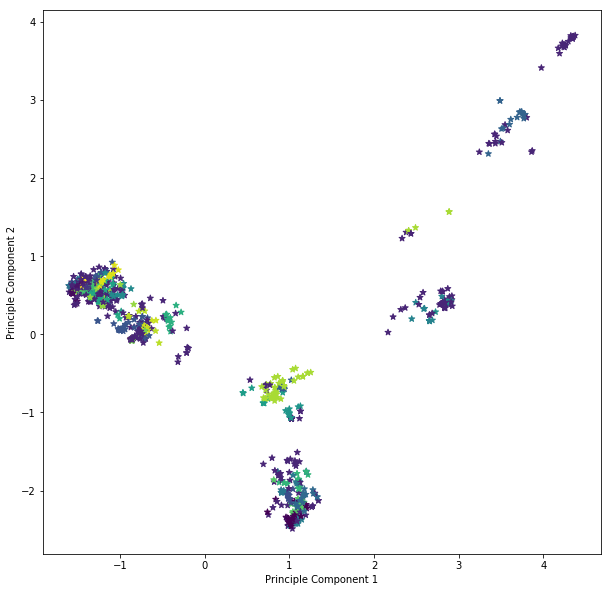

In [305]:
plt.figure(figsize=(10,10))
spectral = SpectralClustering(n_clusters=optimal, affinity='nearest_neighbors', assign_labels='kmeans')
spectral.fit(data)
spectralLabels = spectral.labels_
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.scatter(data[:, 0], data[:, 1], c=spectralLabels, marker="*", s=40, cmap='viridis')
plt.show()

In [306]:
numHaplogroups = 0
haplogroupToLabelNum = {}
for n in groups:
    if n not in haplogroupToLabelNum:
        haplogroupToLabelNum[n] = numHaplogroups
        numHaplogroups+=1
haplogroupLabels = [haplogroupToLabelNum[n] for n in groups]

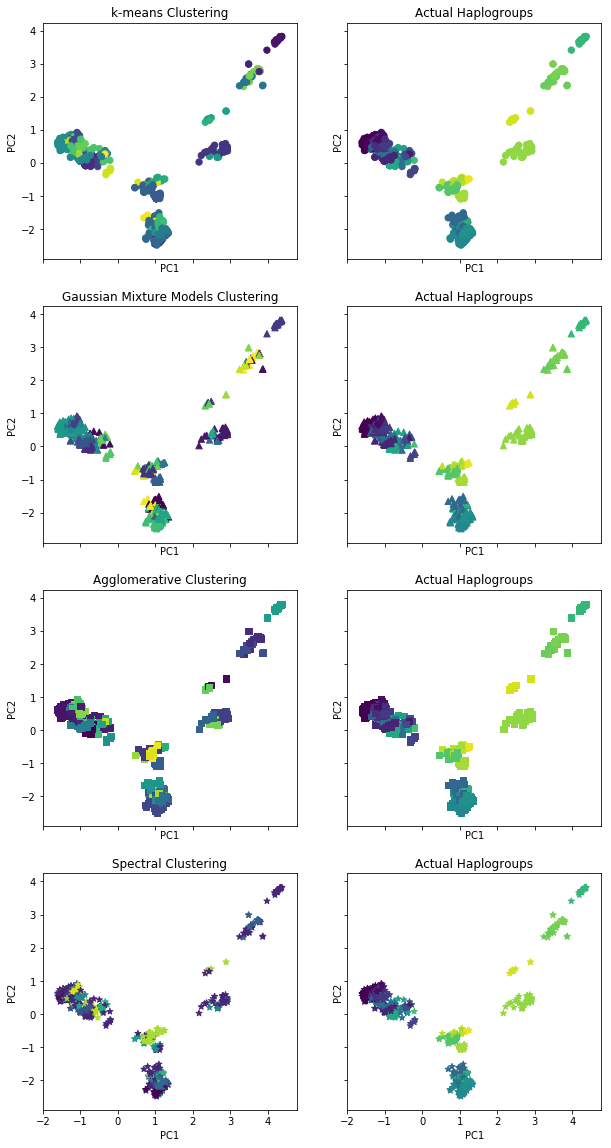

In [307]:
fig, ax = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(10,20))
ax[0,0].scatter(data[:, 0], data[:, 1], c=kmeansLabels, marker="o", s=40, cmap='viridis')
ax[0,0].set(xlabel='PC1', ylabel='PC2', title='k-means Clustering')
ax[0,1].scatter(data[:, 0], data[:, 1], c=haplogroupLabels, marker="o", s=40, cmap='viridis')
ax[0,1].set(xlabel='PC1', ylabel='PC2', title='Actual Haplogroups')
ax[1,0].scatter(data[:, 0], data[:, 1], c=gmmLabels, marker="^", s=40, cmap='viridis')
ax[1,0].set(xlabel='PC1', ylabel='PC2', title='Gaussian Mixture Models Clustering')
ax[1,1].scatter(data[:, 0], data[:, 1], c=haplogroupLabels, marker="^", s=40, cmap='viridis')
ax[1,1].set(xlabel='PC1', ylabel='PC2', title='Actual Haplogroups')
ax[2,0].scatter(data[:, 0], data[:, 1], c=aggloLabels, marker="s", s=40, cmap='viridis')
ax[2,0].set(xlabel='PC1', ylabel='PC2', title='Agglomerative Clustering')
ax[2,1].scatter(data[:, 0], data[:, 1], c=haplogroupLabels, marker="s", s=40, cmap='viridis')
ax[2,1].set(xlabel='PC1', ylabel='PC2', title='Actual Haplogroups')
ax[3,0].scatter(data[:, 0], data[:, 1], c=spectralLabels, marker="*", s=40, cmap='viridis')
ax[3,0].set(xlabel='PC1', ylabel='PC2', title='Spectral Clustering')
ax[3,1].scatter(data[:, 0], data[:, 1], c=haplogroupLabels, marker="*", s=40, cmap='viridis')
ax[3,1].set(xlabel='PC1', ylabel='PC2', title='Actual Haplogroups')
plt.show()

This shows that although the clustering algorithms sometimes found more clusters than haplogroups, they are finding similar enough clusters to be considered accurate.